In [20]:
import pennylane as qml
import numpy as np

#U = np.array([[1, 0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0, 1j]])
#gate =  qml.QubitUnitary(U, wires=[0,1])

gate = qml.CZ

U_matrix = np.array(gate.compute_matrix())
print(U_matrix)
U_adjoint = np.array(qml.adjoint(gate).compute_matrix())
print(U_adjoint)

Z = np.array(qml.PauliZ.compute_matrix())
X = np.array(qml.PauliX.compute_matrix())
I = np.identity(2)
basis = [np.kron(X, I), np.kron(Z, I), np.kron(I, X), np.kron(I, Z)]
correction_operator = []

for base in basis:
    result = np.matmul(U_matrix, base)
    result = np.matmul(result, U_adjoint)
    result = qml.pauli.pauli_decompose(result)
    
    # Access the Pauli decomposition
    # print(result)
    
    for r in result.ops:
        r1, r2 = r.obs[0].name, r.obs[1].name
        correction_operator.append((r1, r2))

print(correction_operator)
    



[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]
[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]
[('PauliX', 'PauliZ'), ('PauliZ', 'Identity'), ('PauliZ', 'PauliX'), ('Identity', 'PauliZ')]


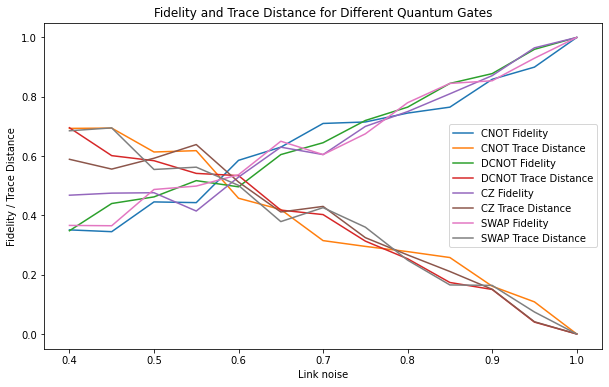

In [7]:
import json
import matplotlib.pyplot as plt

cnot_data = []
dcnot_data = []
cz_data = []
swap_data = []

link_fidelity_results = "link_fidelity_results.json"
with open(link_fidelity_results, "r") as f:
    data = json.load(f)
    for noise, results in data.items():
        cnot_data.append((float(noise), results['cnot']['fidelity'], results['cnot']['trace_distance']))
        dcnot_data.append((float(noise), results['dcnot']['fidelity'], results['dcnot']['trace_distance']))
        cz_data.append((float(noise), results['cz']['fidelity'], results['cz']['trace_distance']))
        swap_data.append((float(noise), results['swap']['fidelity'], results['swap']['trace_distance']))
# Assuming the data is in the following format:
# cnot_data = [(noise1, fidelity1, trace_distance1), (noise2, fidelity2, trace_distance2), ...]

cnot_noise, cnot_fidelity, cnot_trace_distance = zip(*cnot_data)
dcnot_noise, dcnot_fidelity, dcnot_trace_distance = zip(*dcnot_data)
cz_noise, cz_fidelity, cz_trace_distance = zip(*cz_data)
swap_noise, swap_fidelity, swap_trace_distance = zip(*swap_data)

plt.figure(figsize=(10, 6))

plt.plot(cnot_noise, cnot_fidelity, label='CNOT Fidelity')
plt.plot(cnot_noise, cnot_trace_distance, label='CNOT Trace Distance')

plt.plot(dcnot_noise, dcnot_fidelity, label='DCNOT Fidelity')
plt.plot(dcnot_noise, dcnot_trace_distance, label='DCNOT Trace Distance')

plt.plot(cz_noise, cz_fidelity, label='CZ Fidelity')
plt.plot(cz_noise, cz_trace_distance, label='CZ Trace Distance')

plt.plot(swap_noise, swap_fidelity, label='SWAP Fidelity')
plt.plot(swap_noise, swap_trace_distance, label='SWAP Trace Distance')

plt.xlabel('Link noise')
plt.ylabel('Fidelity / Trace Distance')
plt.title('Fidelity and Trace Distance for Different Quantum Gates')
plt.legend()
plt.savefig('resources//link_fidelity_results.png')


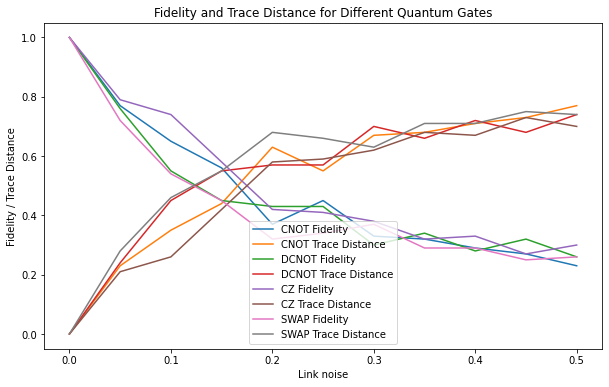

<Figure size 432x288 with 0 Axes>

In [8]:
import json
import matplotlib.pyplot as plt

cnot_data = []
dcnot_data = []
cz_data = []
swap_data = []

link_fidelity_results = "qdevice_noise_results.json"
with open(link_fidelity_results, "r") as f:
    data = json.load(f)
    for noise, results in data.items():
        cnot_data.append((float(noise), results['cnot']['fidelity'], results['cnot']['trace_distance']))
        dcnot_data.append((float(noise), results['dcnot']['fidelity'], results['dcnot']['trace_distance']))
        cz_data.append((float(noise), results['cz']['fidelity'], results['cz']['trace_distance']))
        swap_data.append((float(noise), results['swap']['fidelity'], results['swap']['trace_distance']))
# Assuming the data is in the following format:
# cnot_data = [(noise1, fidelity1, trace_distance1), (noise2, fidelity2, trace_distance2), ...]

cnot_noise, cnot_fidelity, cnot_trace_distance = zip(*cnot_data)
dcnot_noise, dcnot_fidelity, dcnot_trace_distance = zip(*dcnot_data)
cz_noise, cz_fidelity, cz_trace_distance = zip(*cz_data)
swap_noise, swap_fidelity, swap_trace_distance = zip(*swap_data)

plt.figure(figsize=(10, 6))

plt.plot(cnot_noise, cnot_fidelity, label='CNOT Fidelity')
plt.plot(cnot_noise, cnot_trace_distance, label='CNOT Trace Distance')

plt.plot(dcnot_noise, dcnot_fidelity, label='DCNOT Fidelity')
plt.plot(dcnot_noise, dcnot_trace_distance, label='DCNOT Trace Distance')

plt.plot(cz_noise, cz_fidelity, label='CZ Fidelity')
plt.plot(cz_noise, cz_trace_distance, label='CZ Trace Distance')

plt.plot(swap_noise, swap_fidelity, label='SWAP Fidelity')
plt.plot(swap_noise, swap_trace_distance, label='SWAP Trace Distance')

plt.xlabel('Link noise')
plt.ylabel('Fidelity / Trace Distance')
plt.title('Fidelity and Trace Distance for Different Quantum Gates')
plt.legend()
plt.savefig('resources//qdevice_noise_results.png')
